In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import urllib.request
import io
from collections import Counter
from itertools import chain
import seaborn as sns
from IPython.core.debugger import set_trace

import matplotlib.pyplot as plt


# Task 1: Load, clean up and visualize data

#### Load dataset1 -----> Hepatitis.data

In [2]:
# read csv file from URL
hepa_headers =  ["Class","AGE" ,"SEX" ,"STEROID" ,"ANTIVIRALS" ,"FATIGUE","MALAISE","ANOREXIA","LIVER_BIG", "LIVER_FIRM" ,"SPLEEN_PALPABLE" ,"SPIDERS" ,"ASCITES" ,"VARICES" ,"BILIRUBIN" ,"ALK_PHOSPHATE" ,"SGOT", "ALBUMIN", "PROTIME","HISTOLOGY"]
hepa_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", header=None, names=hepa_headers)
print(hepa_data)

# removes malformed or N/A available data
df1 = hepa_data[~hepa_data.eq('?').any(1)]
print(df1)

# to numeric
df1 = df1.apply(pd.to_numeric)
    

     Class  AGE  SEX STEROID  ...  SGOT ALBUMIN PROTIME HISTOLOGY
0        2   30    2       1  ...    18     4.0       ?         1
1        2   50    1       1  ...    42     3.5       ?         1
2        2   78    1       2  ...    32     4.0       ?         1
3        2   31    1       ?  ...    52     4.0      80         1
4        2   34    1       2  ...   200     4.0       ?         1
..     ...  ...  ...     ...  ...   ...     ...     ...       ...
150      1   46    1       2  ...   242     3.3      50         2
151      2   44    1       2  ...   142     4.3       ?         2
152      2   61    1       1  ...    20     4.1       ?         2
153      2   53    2       1  ...    19     4.1      48         2
154      1   43    1       2  ...    19     3.1      42         2

[155 rows x 20 columns]
     Class  AGE  SEX STEROID  ...  SGOT ALBUMIN PROTIME HISTOLOGY
5        2   34    1       2  ...    28     4.0      75         1
10       2   39    1       1  ...    30     4.4    

In [3]:
df1.describe().T  # t-table
print(df1.groupby('Class').size()) # show class distribution

Class
1    13
2    67
dtype: int64


In [4]:
# change all [1, 2] to [0, 1]
df1 = df1.sub([1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0], axis=1)
print(df1)

     Class   AGE  SEX  STEROID  ...   SGOT  ALBUMIN  PROTIME  HISTOLOGY
5      1.0  34.0  0.0      1.0  ...   28.0      4.0     75.0        0.0
10     1.0  39.0  0.0      0.0  ...   30.0      4.4     85.0        0.0
11     1.0  32.0  0.0      1.0  ...  249.0      3.7     54.0        0.0
12     1.0  41.0  0.0      1.0  ...   60.0      3.9     52.0        0.0
13     1.0  30.0  0.0      1.0  ...  144.0      4.9     78.0        0.0
..     ...   ...  ...      ...  ...    ...      ...      ...        ...
139    1.0  45.0  0.0      1.0  ...   44.0      4.2     85.0        1.0
143    0.0  49.0  0.0      0.0  ...   70.0      3.5     35.0        1.0
145    1.0  31.0  0.0      0.0  ...  173.0      4.2     54.0        1.0
153    1.0  53.0  1.0      0.0  ...   19.0      4.1     48.0        1.0
154    0.0  43.0  0.0      1.0  ...   19.0      3.1     42.0        1.0

[80 rows x 20 columns]


In [5]:
# normalize all data to [0, 1]
df1_norm = df1.div(df1.max(axis=0), axis=1)
print(df1_norm)

     Class       AGE  SEX  STEROID  ...      SGOT  ALBUMIN  PROTIME  HISTOLOGY
5      1.0  0.472222  0.0      1.0  ...  0.066667     0.80     0.75        0.0
10     1.0  0.541667  0.0      0.0  ...  0.071429     0.88     0.85        0.0
11     1.0  0.444444  0.0      1.0  ...  0.592857     0.74     0.54        0.0
12     1.0  0.569444  0.0      1.0  ...  0.142857     0.78     0.52        0.0
13     1.0  0.416667  0.0      1.0  ...  0.342857     0.98     0.78        0.0
..     ...       ...  ...      ...  ...       ...      ...      ...        ...
139    1.0  0.625000  0.0      1.0  ...  0.104762     0.84     0.85        1.0
143    0.0  0.680556  0.0      0.0  ...  0.166667     0.70     0.35        1.0
145    1.0  0.430556  0.0      0.0  ...  0.411905     0.84     0.54        1.0
153    1.0  0.736111  1.0      0.0  ...  0.045238     0.82     0.48        1.0
154    0.0  0.597222  0.0      1.0  ...  0.045238     0.62     0.42        1.0

[80 rows x 20 columns]


In [6]:
# pairwise plot (norm)
#pair_wise_plotting = sns.pairplot(df1_norm, hue='Class', diag_kind='hist', markers=['o','s'])
#plt.show()

#### Load dataset2 -----> messidor_features.arff

In [7]:
# read arff file from url using io.StringIO() wrapper
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
df2 = pd.DataFrame.from_records(data)
print(df2)

# to numeric
df2 = df2.apply(pd.to_numeric)

        0    1     2     3     4  ...        15        16        17   18  Class
0     1.0  1.0  22.0  22.0  22.0  ...  0.003923  0.486903  0.100025  1.0   b'0'
1     1.0  1.0  24.0  24.0  22.0  ...  0.003903  0.520908  0.144414  0.0   b'0'
2     1.0  1.0  62.0  60.0  59.0  ...  0.007744  0.530904  0.128548  0.0   b'1'
3     1.0  1.0  55.0  53.0  53.0  ...  0.001531  0.483284  0.114790  0.0   b'0'
4     1.0  1.0  44.0  44.0  44.0  ...  0.000000  0.475935  0.123572  0.0   b'1'
...   ...  ...   ...   ...   ...  ...       ...       ...       ...  ...    ...
1146  1.0  1.0  34.0  34.0  34.0  ...  0.000000  0.537470  0.116795  0.0   b'0'
1147  1.0  1.0  49.0  49.0  49.0  ...  0.000000  0.516733  0.124190  0.0   b'0'
1148  1.0  0.0  49.0  48.0  48.0  ...  0.000000  0.560632  0.129843  0.0   b'0'
1149  1.0  1.0  39.0  36.0  29.0  ...  0.174584  0.485972  0.106690  1.0   b'1'
1150  1.0  1.0   7.0   7.0   7.0  ...  0.000000  0.556192  0.088957  0.0   b'0'

[1151 rows x 20 columns]


In [8]:
df2 = df2[~df2.eq('?').any(1)]
print(df2)  # no malformed data found

        0    1     2     3     4  ...        15        16        17   18  Class
0     1.0  1.0  22.0  22.0  22.0  ...  0.003923  0.486903  0.100025  1.0      0
1     1.0  1.0  24.0  24.0  22.0  ...  0.003903  0.520908  0.144414  0.0      0
2     1.0  1.0  62.0  60.0  59.0  ...  0.007744  0.530904  0.128548  0.0      1
3     1.0  1.0  55.0  53.0  53.0  ...  0.001531  0.483284  0.114790  0.0      0
4     1.0  1.0  44.0  44.0  44.0  ...  0.000000  0.475935  0.123572  0.0      1
...   ...  ...   ...   ...   ...  ...       ...       ...       ...  ...    ...
1146  1.0  1.0  34.0  34.0  34.0  ...  0.000000  0.537470  0.116795  0.0      0
1147  1.0  1.0  49.0  49.0  49.0  ...  0.000000  0.516733  0.124190  0.0      0
1148  1.0  0.0  49.0  48.0  48.0  ...  0.000000  0.560632  0.129843  0.0      0
1149  1.0  1.0  39.0  36.0  29.0  ...  0.174584  0.485972  0.106690  1.0      1
1150  1.0  1.0   7.0   7.0   7.0  ...  0.000000  0.556192  0.088957  0.0      0

[1151 rows x 20 columns]


In [9]:
df2.describe().T  #t-table
print(df2.groupby('Class').size()) # show class distribution

Class
0    540
1    611
dtype: int64


In [10]:
# normalize all data to [0, 1]
df2_norm = df2.div(df2.max(axis=0), axis=1)
print(df2_norm)

        0    1         2         3  ...        16        17   18  Class
0     1.0  1.0  0.145695  0.166667  ...  0.822170  0.456321  1.0    0.0
1     1.0  1.0  0.158940  0.181818  ...  0.879590  0.658826  0.0    0.0
2     1.0  1.0  0.410596  0.454545  ...  0.896469  0.586444  0.0    1.0
3     1.0  1.0  0.364238  0.401515  ...  0.816059  0.523679  0.0    0.0
4     1.0  1.0  0.291391  0.333333  ...  0.803650  0.563743  0.0    1.0
...   ...  ...       ...       ...  ...       ...       ...  ...    ...
1146  1.0  1.0  0.225166  0.257576  ...  0.907556  0.532826  0.0    0.0
1147  1.0  1.0  0.324503  0.371212  ...  0.872540  0.566563  0.0    0.0
1148  1.0  0.0  0.324503  0.363636  ...  0.946667  0.592352  0.0    0.0
1149  1.0  1.0  0.258278  0.272727  ...  0.820598  0.486727  1.0    1.0
1150  1.0  1.0  0.046358  0.053030  ...  0.939169  0.405828  0.0    0.0

[1151 rows x 20 columns]


In [11]:
# pairwise plot (norm)
#pair_wise_plotting = sns.pairplot(df2_norm, hue='Class', diag_kind='hist', markers=['o','s'])
#plt.show()

#### Covariate matrix

In [12]:
# covariate matrix
cor_matrix = df2.corr().abs()
print(cor_matrix)

              0         1         2  ...        17        18     Class
0      1.000000  0.017611  0.035576  ...  0.067325  0.051723  0.062816
1      0.017611  1.000000  0.053300  ...  0.079577  0.010782  0.076925
2      0.035576  0.053300  1.000000  ...  0.033992  0.344317  0.292603
3      0.035929  0.054839  0.996177  ...  0.034714  0.360716  0.266338
4      0.033395  0.053056  0.985730  ...  0.030396  0.389384  0.234691
5      0.036506  0.059063  0.963149  ...  0.016854  0.411806  0.197511
6      0.034817  0.060557  0.925274  ...  0.010961  0.437036  0.161631
7      0.031889  0.060152  0.859620  ...  0.011607  0.435127  0.127861
8      0.063597  0.062930  0.229653  ...  0.086474  0.390304  0.058015
9      0.063061  0.052453  0.103047  ...  0.090721  0.291554  0.000479
10     0.044449  0.053534  0.044650  ...  0.098866  0.284990  0.038281
11     0.027656  0.041607  0.103035  ...  0.090738  0.172499  0.104254
12     0.013336  0.015900  0.134464  ...  0.058645  0.072363  0.142273
13    

# Task 2: Define KNN and Decision Tree Functions

#### Define distance functions and evaluate accuracy function

In [13]:
# Define the distance function
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

# Calculate accuracy
evaluate_acc = lambda y_test, y_pred: np.sum(y_test == y_pred)/y_test.shape[0]*100
evaluate_err = lambda y_test, y_pred: (1-np.sum(y_test == y_pred)/y_test.shape[0])*100

#### Class definition for KNN: with functions fit() and predict()

In [14]:
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns


#### Class definition for Decision Tree: with functions fit() and predict()

In [15]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left= None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            #print(node.labels[left_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0] #Gives the total number of instances to the left and the right
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    #print(labels)
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
    
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node) #This is basically to classify the number of data points which the current node is going to classify
    #For instance the first node will have to classify 100 instances whereas as we go down, the instances would reduce and we would have to classify fewer instances
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

#### Define cross validation helper function

In [16]:
def cross_validate(n, n_folds=10):
    #get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds

np.random.seed(0)   # seed np.random

# Task 3: Running Experiments

#### Dataset 1 - Preparation

In [17]:
# Choose two best parameters
df1_norm = df1_norm.filter(['Class','ALBUMIN','PROTIME'])

# To numpy arrays
np1 = df1_norm.to_numpy()
#print(np1)

# Separate data and label
x = np1[:,1::]
y = np1[:,0].astype(int)
print(np.shape(y))
print(y.dtype)

# Necessary variables
(num_instances, num_features), num_classes = x.shape, np.max(y)+1

(80,)
int64


#### Dataset 1 - KNN


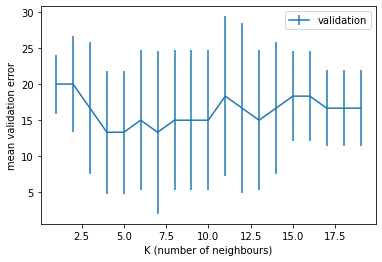

In [18]:
# Set aside test data
n_test = num_instances // 4
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test

# L-fold cross-validation
num_folds = 5

# Initialize arrays
K_list = range(1,20)
err_train = np.zeros(len(K_list))
err_valid = np.zeros((len(K_list), num_folds))
err_test = np.zeros(len(K_list))

# Run KNN
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        #print(np.shape(f), np.shape(tr), np.shape(val))
        model = KNN(K)
        y_prob, knns = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred = np.argmax(y_prob,axis=-1)
        err_valid[i, f] = evaluate_err(y_rest[val], y_pred)
    #Find training errors
    model = KNN(K)
    y_prob, knns = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred = np.argmax(y_prob,axis=-1)
    err_train[i]= evaluate_err(y_rest, y_pred)
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)
    err_test[i]= evaluate_err(y_test, y_pred)

#plt.plot(K_list, err_train, label='train')
#plt.plot(K_list, err_test, label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean validation error')
plt.show()

In [19]:
# Choose hyperparameter and estimate generalization accuracy
model_best = KNN(3)
y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)

print(f'Estimated generalization accuracy: {acc_gen:.1f}.')

Estimated generalization accuracy: 85.0.


##### Change Distance Function

In [20]:
# Using Manhattan Distance
model_best = KNN(3,dist_fn=manhattan)
y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)

print(f'Estimated generalization accuracy (Manhattan): {acc_gen:.1f}.')

Estimated generalization accuracy (Manhattan): 85.0.


##### Decision Boundary

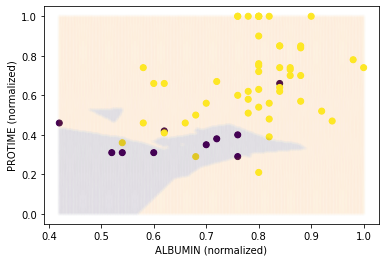

In [21]:
#decision boundary with KNN on hepa_data
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=3)
C = np.max(y_rest)+1  # number of classes

y_train_prob = np.zeros((y_rest.shape[0], C))
y_train_prob[np.arange(y_rest.shape[0]), y_rest] = 1

y_prob_all, _ = model.fit(x_rest, y_rest).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

plt.scatter(x_rest[:,0], x_rest[:,1], c=np.argmax(y_train_prob, axis = 1), marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis = 1), marker='.', alpha=0.01)
plt.xlabel('ALBUMIN (normalized)')
plt.ylabel('PROTIME (normalized)')
plt.show()

#### Dataset 1 - Decision Tree

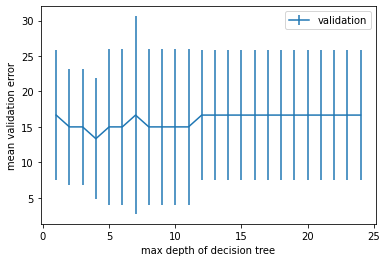

In [22]:
# Set aside test data
n_test = num_instances // 4
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test

# L-fold cross-validation
num_folds = 5

# Initialize arrays
max_depth_list = range(1,25)
err_train = np.zeros(len(max_depth_list))
err_valid = np.zeros((len(max_depth_list), num_folds))
err_test = np.zeros(len(max_depth_list))

# Run Decision tree
for i, max in enumerate(max_depth_list):
    #Find the validation errors for num_folds splits for a given max
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        #print(np.shape(f), np.shape(tr), np.shape(val))
        tree = DecisionTree(max_depth=max)
        y_prob = tree.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred = np.argmax(y_prob,axis=-1)
        err_valid[i, f] = evaluate_err(y_rest[val], y_pred)
    #Find training errors
    tree = DecisionTree(max_depth=max)
    y_prob = tree.fit(x_rest, y_rest).predict(x_rest)
    y_pred = np.argmax(y_prob,axis=-1)
    err_train[i]= evaluate_err(y_rest, y_pred)
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    y_prob = tree.fit(x_rest, y_rest).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)
    err_test[i]= evaluate_err(y_test, y_pred)

#plt.plot(max_depth_list, err_train, label='train')
#plt.plot(max_depth_list, err_test, label='test')
plt.errorbar(max_depth_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('max depth of decision tree')
plt.ylabel('mean validation error')
plt.show()

Estimated generalization accuracy: 75.0.


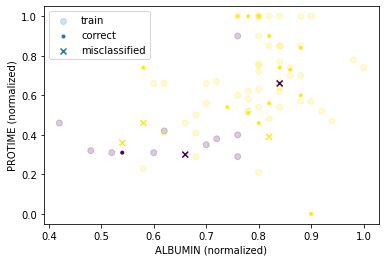

In [23]:
# Choose hyperparameter and estimate generalization error
tree = DecisionTree(max_depth=10)

probs_test = tree.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)
print(f'Estimated generalization accuracy: {acc_gen:.1f}.')
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_rest[:,0], x_rest[:,1], c=y_rest, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.xlabel('ALBUMIN (normalized)')
plt.ylabel('PROTIME (normalized)')
plt.show()

##### Change Cost Function

Estimated generalization accuracy (Gini): 75.0.


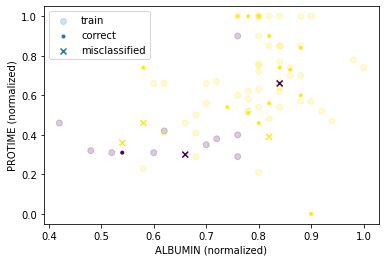

In [24]:
# Using Gini Index
tree = DecisionTree(max_depth=10,cost_fn=cost_gini_index)

probs_test = tree.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)
print(f'Estimated generalization accuracy (Gini): {acc_gen:.1f}.')
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_rest[:,0], x_rest[:,1], c=y_rest, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.xlabel('ALBUMIN (normalized)')
plt.ylabel('PROTIME (normalized)')
plt.show()

##### Decision Boundary

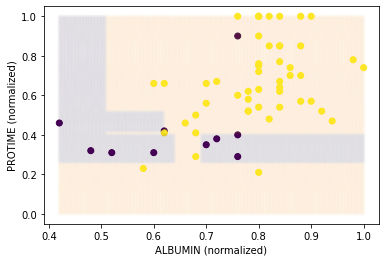

In [25]:
# decision boundary with decision tree on hepa_data
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

tree = DecisionTree(max_depth=10)
C = np.max(y_rest)+1  # number of classes

y_train_prob = np.zeros((y_rest.shape[0], C))
y_train_prob[np.arange(y_rest.shape[0]), y_rest] = 1

y_prob_all = tree.fit(x_rest, y_rest).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

plt.scatter(x_rest[:,0], x_rest[:,1], c=np.argmax(y_train_prob, axis = 1), marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis = 1), marker='.', alpha=0.01)
plt.xlabel('ALBUMIN (normalized)')
plt.ylabel('PROTIME (normalized)')
plt.show()

#### Dataset 2 - Preparation

In [26]:
# Choose two best parameters
df2_norm = df2_norm.filter(['Class','2','5'])

# To numpy arrays
np2 = df2_norm.to_numpy()
print(np2)

# Separate data and label
x = np2[:,1::]
y = np2[:,0].astype(int)
print(np.shape(y))
print(y.dtype)

# Necessary variables
(num_instances, num_features), num_classes = x.shape, np.max(y)+1

[[0.         0.14569536 0.18095238]
 [0.         0.1589404  0.17142857]
 [1.         0.41059603 0.51428571]
 ...
 [0.         0.32450331 0.42857143]
 [1.         0.25827815 0.21904762]
 [0.         0.04635762 0.06666667]]
(1151,)
int64


#### Dataset 2 - KNN

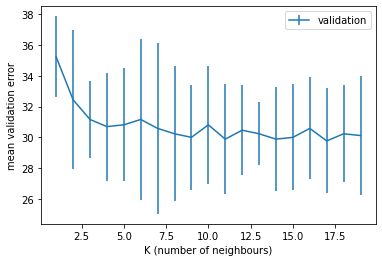

In [35]:
# Set aside test data
n_test = num_instances // 4
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test

# L-fold cross-validation
num_folds = 5

# Initialize arrays
K_list = range(1,20)
err_train = np.zeros(len(K_list))
err_valid = np.zeros((len(K_list), num_folds))
err_test = np.zeros(len(K_list))

# Run KNN
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        #print(np.shape(f), np.shape(tr), np.shape(val))
        model = KNN(K)
        y_prob, knns = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred = np.argmax(y_prob,axis=-1)
        err_valid[i, f] = evaluate_err(y_rest[val], y_pred)
    #Find training errors
    model = KNN(K)
    y_prob, knns = model.fit(x_rest, y_rest).predict(x_rest)
    y_pred = np.argmax(y_prob,axis=-1)
    err_train[i]= evaluate_err(y_rest, y_pred)
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)
    err_test[i]= evaluate_err(y_test, y_pred)

#plt.plot(K_list, err_train, label='train')
#plt.plot(K_list, err_test, label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean validation error')
plt.show()

In [36]:
# Choose hyperparameter and estimate generalization accuracy
model_best = KNN(4)
y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)

print(f'Estimated generalization accuracy: {acc_gen:.1f}.')

Estimated generalization accuracy: 68.6.


Change Distance Function

In [37]:
# Using Manhattan Distance
model_best = KNN(4,dist_fn=manhattan)
y_prob, knns = model.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)

print(f'Estimated generalization accuracy (Manhattan): {acc_gen:.1f}.')

Estimated generalization accuracy (Manhattan): 68.6.


##### Decision Boundary

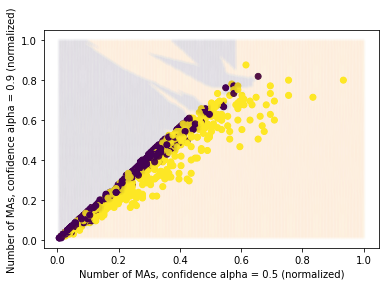

In [38]:
#decision boundary with KNN on diabetes_data
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=4)
C = np.max(y_rest)+1  # number of classes

y_train_prob = np.zeros((y_rest.shape[0], C))
y_train_prob[np.arange(y_rest.shape[0]), y_rest] = 1

y_prob_all, _ = model.fit(x_rest, y_rest).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

plt.scatter(x_rest[:,0], x_rest[:,1], c=np.argmax(y_train_prob, axis = 1), marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis = 1), marker='.', alpha=0.01)
plt.xlabel('Number of MAs, confidence alpha = 0.5 (normalized)')
plt.ylabel('Number of MAs, confidence alpha = 0.9 (normalized)')
plt.show()

#### Dataset 2 - Decision Tree

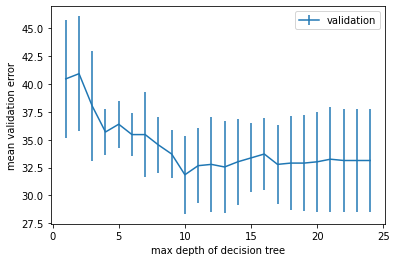

In [31]:
# Set aside test data
n_test = num_instances // 4
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test

# L-fold cross-validation
num_folds = 5

# Initialize arrays
max_depth_list = range(1,25)
err_train = np.zeros(len(max_depth_list))
err_valid = np.zeros((len(max_depth_list), num_folds))
err_test = np.zeros(len(max_depth_list))

# Run Decision tree
for i, max in enumerate(max_depth_list):
    #Find the validation errors for num_folds splits for a given max
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        #print(np.shape(f), np.shape(tr), np.shape(val))
        tree = DecisionTree(max_depth=max)
        y_prob = tree.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred = np.argmax(y_prob,axis=-1)
        err_valid[i, f] = evaluate_err(y_rest[val], y_pred)
    #Find training errors
    tree = DecisionTree(max_depth=max)
    y_prob = tree.fit(x_rest, y_rest).predict(x_rest)
    y_pred = np.argmax(y_prob,axis=-1)
    err_train[i]= evaluate_err(y_rest, y_pred)
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    y_prob = tree.fit(x_rest, y_rest).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)
    err_test[i]= evaluate_err(y_test, y_pred)

#plt.plot(max_depth_list, err_train, label='train')
#plt.plot(max_depth_list, err_test, label='test')
plt.errorbar(max_depth_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('max depth of decision tree')
plt.ylabel('mean validation error')
plt.show()

Estimated generalization accuracy: 62.4.


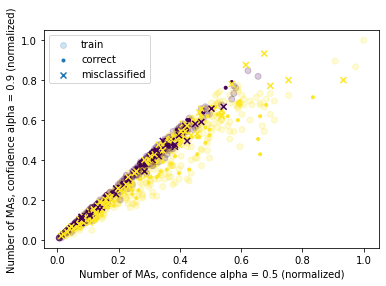

In [32]:
# Choose hyperparameter and estimate generalization error
tree = DecisionTree(max_depth=10)

probs_test = tree.fit(x_rest, y_rest).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)
acc_gen = evaluate_acc(y_test, y_pred)
print(f'Estimated generalization accuracy: {acc_gen:.1f}.')
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_rest[:,0], x_rest[:,1], c=y_rest, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.xlabel('Number of MAs, confidence alpha = 0.5 (normalized)')
plt.ylabel('Number of MAs, confidence alpha = 0.9 (normalized)')
plt.show()

##### Decision Boundary

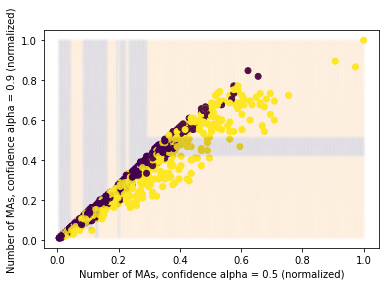

In [33]:
# decision boundary with decision tree on diabetes_data
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

tree = DecisionTree(max_depth=10)
C = np.max(y_rest)+1  # number of classes

y_train_prob = np.zeros((y_rest.shape[0], C))
y_train_prob[np.arange(y_rest.shape[0]), y_rest] = 1

y_prob_all = tree.fit(x_rest, y_rest).predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

plt.scatter(x_rest[:,0], x_rest[:,1], c=np.argmax(y_train_prob, axis = 1), marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis = 1), marker='.', alpha=0.01)
plt.xlabel('Number of MAs, confidence alpha = 0.5 (normalized)')
plt.ylabel('Number of MAs, confidence alpha = 0.9 (normalized)')
plt.show()